In [3]:
# Linear Regression - CAR PRICE PREDICTION


In [4]:
import pandas as pd
import numpy as numpy

In [6]:
car_data = pd.read_csv('D:/ML_practice/Car_Price_LinearReg/CarPrice_Assignment.csv')

In [7]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
car_data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
car_data.duplicated().any()

False

In [12]:
car_data.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [13]:
car_data = car_data.drop('car_ID',axis=1 )

In [14]:
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


((array([-2.7088841 , -2.40021466, -2.22436022, -2.09847761, -1.99906119,
         -1.91619334, -1.84471334, -1.78157842, -1.72483748, -1.67316142,
         -1.62560232, -1.58145939, -1.54019924, -1.50140611, -1.46474936,
         -1.4299615 , -1.39682292, -1.36515103, -1.33479227, -1.30561622,
         -1.27751112, -1.25038041, -1.22414012, -1.19871667, -1.17404528,
         -1.15006853, -1.12673532, -1.10399994, -1.08182134, -1.0601625 ,
         -1.03898989, -1.01827309, -0.99798434, -0.9780983 , -0.95859171,
         -0.93944323, -0.92063316, -0.90214332, -0.88395686, -0.86605818,
         -0.84843274, -0.83106701, -0.81394837, -0.79706499, -0.78040581,
         -0.76396046, -0.74771918, -0.73167277, -0.71581259, -0.70013046,
         -0.68461865, -0.66926986, -0.65407714, -0.63903392, -0.62413394,
         -0.60937126, -0.59474021, -0.58023538, -0.56585161, -0.55158398,
         -0.53742776, -0.52337843, -0.50943166, -0.49558329, -0.48182931,
         -0.46816589, -0.45458932, -0.

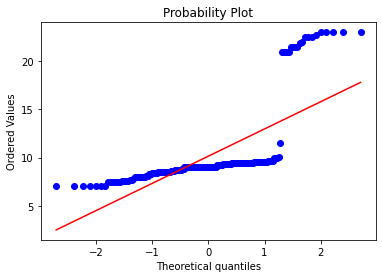

In [25]:
from scipy import stats
import scipy as scipy
import matplotlib.pyplot as plt
stats.probplot(car_data['compressionratio'], plot=plt)

In [60]:
features = [col for col in x_train.columns.tolist()]
numerical_features=[]
categorical_features=[]
y_feature=car_data['price']
x_features=car_data[features]

x_features.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [62]:
x_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [61]:
for col in features:
    if x_features[col].dtype in ['int64','int32','float32','float64']:
        numerical_features.append(col)
    else:
        
        categorical_features.append(col)
        
print('There are {:} numerical features.'.format(len(numerical_features)))
print('There are {:} categorical features.'.format(len(categorical_features)))
    

There are 14 numerical features.
There are 10 categorical features.


In [65]:
for item in range(len(x_features)):
    x_features.loc[item,'CarName'] = x_features.loc[item,'CarName'].split(' ')[0]
    
x_features[categorical_features].tail()

D:\DA\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi
204,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi


In [92]:
x_features.CarName.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
renault         2
maxda           2
mercury         1
porcshce        1
Nissan          1
vokswagen       1
toyouta         1
Name: CarName, dtype: int64

In [96]:
x_data=x_features[numerical_features]
y_data=y_feature

In [97]:
x_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [98]:
y_data.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.33, random_state=42)

In [106]:
car_model=LinearRegression().fit(x_train,y_train)

In [108]:
car_price_prediction=car_model.predict(x_test)

In [110]:
car_price_prediction[:5]

array([26003.32905458, 17332.10244215,  9969.92120186, 14912.81155938,
       25003.68744719])

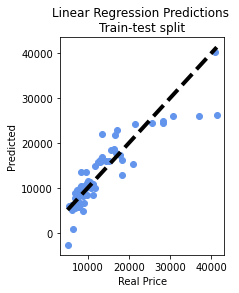

In [111]:
#Predictions plot
plt.figure(figsize=(10,4))

def plot_regression(real, predicted, color, title):
  plt.scatter(real, predicted, color=color)
  plt.plot([real.min(), real.max()], [real.min(), real.max()], 'k--', lw=4)
  plt.xlabel('Real Price')
  plt.ylabel('Predicted')
  plt.title(title)


#Real price vs train-test predictions plot (without outliers)
plt.subplot(131)
plot_regression(y_test, car_price_prediction, 'cornflowerblue', 'Linear Regression Predictions \nTrain-test split')
plt.show()

In [114]:
from sklearn.metrics import mean_squared_error, r2_score
#R2 coefficient, MAE and MSE measures
print('Test split evaluation \n',
      'Coefficient of determination R2: %.3f \n' % r2_score(y_test, car_price_prediction)

Test split evaluation 
 Coefficient of determination R2: 0.797 



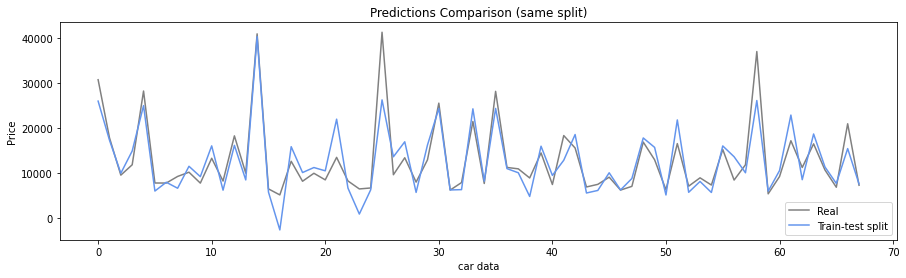

Euclidean distance between prices
- Real vs train-test: 30018.411


In [117]:

import numpy as np
#Predictions comparison plot
plt.figure(figsize=(15,4))

plt.plot(np.array(y_test), color='grey', label='Real')
plt.plot(car_price_prediction, color='cornflowerblue', label='Train-test split')
plt.xlabel('car data')
plt.ylabel('Price')
plt.title('Predictions Comparison (same split)')
plt.legend(loc=4)
plt.show()


from scipy.spatial import distance


#Predictions distance (in general)
print('Euclidean distance between prices')
print('- Real vs train-test: %.3f' % distance.euclidean(y_test, car_price_prediction))